In [1]:
# import library
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/atps.csv')
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024/03/20 01:00:30 PM,2024/04/20 07:02:24 AM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024/03/20 01:00:30 PM,2024/04/20 07:02:24 AM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024/03/20 01:00:30 PM,2024/04/20 07:02:24 AM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024/03/20 01:00:30 PM,2024/04/20 07:02:24 AM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024/03/20 01:00:30 PM,2024/04/20 07:02:24 AM


In [3]:
df.shape

(35649, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35649 entries, 0 to 35648
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              35649 non-null  int64 
 1   Activity Period Start Date   35649 non-null  object
 2   Operating Airline            35649 non-null  object
 3   Operating Airline IATA Code  35333 non-null  object
 4   Published Airline            35649 non-null  object
 5   Published Airline IATA Code  35333 non-null  object
 6   GEO Summary                  35649 non-null  object
 7   GEO Region                   35649 non-null  object
 8   Activity Type Code           35649 non-null  object
 9   Price Category Code          35649 non-null  object
 10  Terminal                     35649 non-null  object
 11  Boarding Area                35649 non-null  object
 12  Passenger Count              35649 non-null  int64 
 13  data_as_of                   35

In [5]:
#untuk encoding
from sklearn.preprocessing import LabelEncoder

cats = df.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35649 entries, 0 to 35648
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Activity Period              35649 non-null  int64
 1   Activity Period Start Date   35649 non-null  int64
 2   Operating Airline            35649 non-null  int64
 3   Operating Airline IATA Code  35649 non-null  int64
 4   Published Airline            35649 non-null  int64
 5   Published Airline IATA Code  35649 non-null  int64
 6   GEO Summary                  35649 non-null  int64
 7   GEO Region                   35649 non-null  int64
 8   Activity Type Code           35649 non-null  int64
 9   Price Category Code          35649 non-null  int64
 10  Terminal                     35649 non-null  int64
 11  Boarding Area                35649 non-null  int64
 12  Passenger Count              35649 non-null  int64
 13  data_as_of                   35649 non-null  i

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Activity Period,35649.0,201189.305254,715.271888,199907.0,200604.0,201208.0,201806.0,202402.0
Activity Period Start Date,35649.0,153.484137,85.752385,0.0,81.0,157.0,227.0,295.0
Operating Airline,35649.0,75.490336,42.155915,0.0,36.0,77.0,123.0,136.0
Operating Airline IATA Code,35649.0,59.761396,32.992114,0.0,25.0,67.0,94.0,113.0
Published Airline,35649.0,65.422172,38.812771,0.0,25.0,65.0,110.0,122.0
Published Airline IATA Code,35649.0,53.972650,31.864736,0.0,21.0,59.0,87.0,102.0
GEO Summary,35649.0,0.644141,0.478779,0.0,0.0,1.0,1.0,1.0
GEO Region,35649.0,4.326797,3.170060,0.0,1.0,4.0,8.0,8.0
Activity Type Code,35649.0,0.592555,0.600785,0.0,0.0,1.0,1.0,2.0
Price Category Code,35649.0,0.891946,0.310452,0.0,1.0,1.0,1.0,1.0


In [10]:
df.corr(numeric_only=True)

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
Activity Period,1.000000,0.999373,0.020253,-0.056155,-0.012066,-0.075468,0.090000,-0.044612,-0.056034,0.012925,-0.139305,0.043887,0.009434,0.875963,NaN
Activity Period Start Date,0.999373,1.000000,0.020341,-0.056175,-0.011973,-0.075415,0.090099,-0.044644,-0.056100,0.012899,-0.139133,0.043933,0.010021,0.875923,NaN
Operating Airline,0.020253,0.020341,1.000000,0.808880,0.954364,0.784809,-0.108288,0.144961,0.082650,-0.068938,0.180667,0.262126,0.160832,0.032259,NaN
Operating Airline IATA Code,-0.056155,-0.056175,0.808880,1.000000,0.771029,0.918852,-0.092825,0.088389,0.072160,-0.100632,0.170351,0.279213,0.101013,-0.035555,NaN
Published Airline,-0.012066,-0.011973,0.954364,0.771029,1.000000,0.846278,-0.053954,0.095995,0.083026,-0.074307,0.173216,0.278488,0.177149,0.001580,NaN
Published Airline IATA Code,-0.075468,-0.075415,0.784809,0.918852,0.846278,1.000000,-0.004737,0.011095,0.074059,-0.113661,0.137371,0.294977,0.130772,-0.058415,NaN
GEO Summary,0.090000,0.090099,-0.108288,-0.092825,-0.053954,-0.004737,1.000000,-0.861254,-0.025439,0.385236,-0.555244,0.136956,-0.383465,0.057086,NaN
GEO Region,-0.044612,-0.044644,0.144961,0.088389,0.095995,0.011095,-0.861254,1.000000,0.032842,-0.354164,0.489199,-0.129330,0.322669,-0.024763,NaN
Activity Type Code,-0.056034,-0.056100,0.082650,0.072160,0.083026,0.074059,-0.025439,0.032842,1.000000,0.004139,0.072480,0.066067,-0.065022,-0.047917,NaN
Price Category Code,0.012925,0.012899,-0.068938,-0.100632,-0.074307,-0.113661,0.385236,-0.354164,0.004139,1.000000,-0.075798,0.224002,-0.042021,0.004141,NaN


In [12]:
df.isnull().sum()

Activity Period                0
Activity Period Start Date     0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
data_as_of                     0
data_loaded_at                 0
dtype: int64

In [13]:
#scaling
from sklearn.preprocessing import StandardScaler

X = df.astype(float).values
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-1.79277735, -1.78987779, -1.76704456, ...,  0.05577211,
        -1.49208358,  0.        ],
       [-1.79277735, -1.78987779, -1.76704456, ...,  0.05451036,
        -1.49208358,  0.        ],
       [-1.79277735, -1.78987779, -1.76704456, ..., -0.40603032,
        -1.49208358,  0.        ],
       ...,
       [ 1.69545564,  1.65030801,  1.34051071, ..., -0.41717848,
         1.68256802,  0.        ],
       [ 1.69545564,  1.65030801,  1.4353979 , ..., -0.37312885,
         1.68256802,  0.        ],
       [ 1.69545564,  1.65030801,  1.4353979 , ..., -0.36932761,
         1.68256802,  0.        ]])

# KMeans

In [14]:
# KMeans clustering
from sklearn.cluster import KMeans

In [16]:
# elbow method to find optimal number of clusters (k)
inertia_list = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    print(f'k={k}, inertia={kmeans_model.inertia_}')

k=1, inertia=499086.00000000047
k=2, inertia=388419.0393742339
k=3, inertia=339187.24771828356
k=4, inertia=300770.83116887545
k=5, inertia=280819.4326664115
k=6, inertia=255325.7929886803
k=7, inertia=236036.48278176406
k=8, inertia=219982.28983108888
k=9, inertia=202721.35843795334
k=10, inertia=194218.25733957242


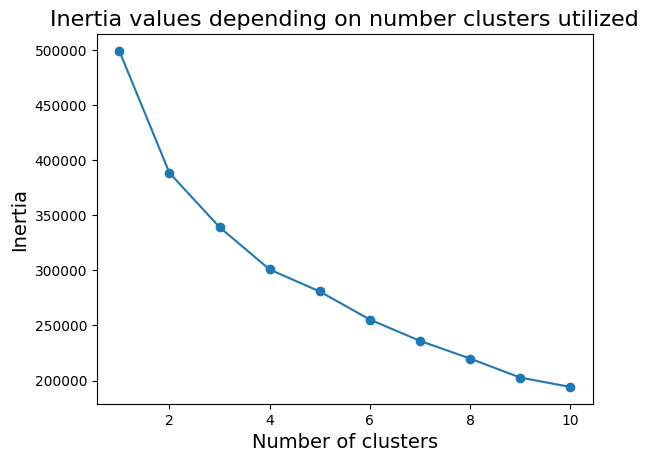

In [17]:
# visualize the elbow method
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('Inertia values depending on number clusters utilized', fontsize=16)
plt.show()

In [18]:
from kneed import KneeLocator, DataGenerator

kneedle = KneeLocator(range(1, 11), inertia_list, curve='convex', direction='decreasing', S=1)
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

4
4


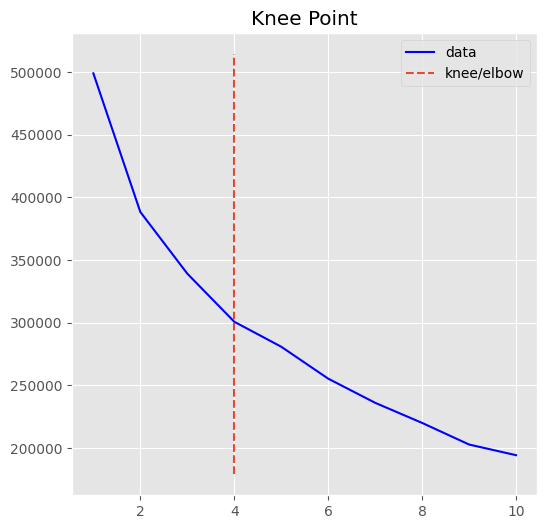

In [19]:
# visualize the knee point
plt.style.use('ggplot')
kneedle.plot_knee()

In [21]:
# shilloute method for searching k
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans_model.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    print(f'For n_clusters={k}, silhouette score is {score}')

For n_clusters=2, silhouette score is 0.21748730088965207
For n_clusters=3, silhouette score is 0.19825966931932065
For n_clusters=4, silhouette score is 0.21492153863352736
For n_clusters=5, silhouette score is 0.1967953473899308
For n_clusters=6, silhouette score is 0.1983536488123212
For n_clusters=7, silhouette score is 0.19080830819340303
For n_clusters=8, silhouette score is 0.19595408952129661
For n_clusters=9, silhouette score is 0.22629969188296328
For n_clusters=10, silhouette score is 0.21904473414475475


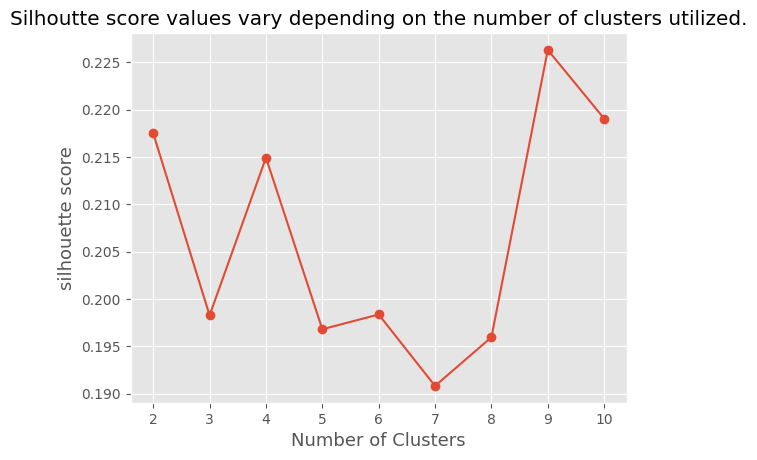

In [22]:
# visualizing silhoutte score
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Silhoutte score values vary depending on the number of clusters utilized.")
plt.show()

In [24]:
# kmeans

k_means = KMeans(n_clusters=9, random_state=42)
k_means.fit(X)
labels = k_means.labels_
df['cluster_labels'] = labels
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at,cluster_labels
0,199907,0,1,93,1,86,0,8,0,0,2,1,31432,0,0,2
1,199907,0,1,93,1,86,0,8,1,0,2,1,31353,0,0,2
2,199907,0,1,93,1,86,0,8,2,0,2,1,2518,0,0,2
3,199907,0,3,113,3,102,1,4,0,1,3,3,1324,0,0,0
4,199907,0,3,113,3,102,1,4,1,1,3,3,1198,0,0,0


In [25]:
# cehck for centroids
centroids = k_means.cluster_centers_
centroids

array([[-1.06105376e+00, -1.06135625e+00, -1.01491440e+00,
        -9.06500517e-01, -9.39308686e-01, -8.06470090e-01,
         6.42689887e-01, -6.87812519e-01,  1.81690385e-02,
         3.13818919e-01, -2.78691949e-01, -5.09272027e-01,
        -2.97301980e-01, -8.61973774e-01,  0.00000000e+00],
       [ 8.88586818e-01,  8.88906535e-01,  9.54826490e-01,
         8.17342319e-01,  9.99377557e-01,  8.91907787e-01,
         5.73743920e-01, -3.62663454e-01, -8.77419015e-02,
         3.48056754e-01, -1.14957127e-01,  5.88737809e-01,
        -2.27796426e-01,  7.12506551e-01,  0.00000000e+00],
       [-7.82051279e-02, -7.80627949e-02, -6.19863007e-01,
        -6.62477866e-01, -5.82428241e-01, -5.77115223e-01,
        -1.28721098e+00,  1.12956243e+00, -8.35124077e-02,
        -2.87309466e+00,  1.09849896e-01, -6.81341484e-01,
        -1.01073971e-01, -2.33132344e-02,  0.00000000e+00],
       [-9.20158936e-01, -9.20694795e-01,  7.86624986e-01,
         7.52881650e-01,  8.03341326e-01,  7.95130092

In [ ]:
# visualization
x1 = df_new['PURCHASES']
x2 = df_new['PAYMENTS']

plt.figure(figsize=(8,6))
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(x1[df_new['cluster_labels'] == i], x2[df_new['cluster_labels'] == i], label = i)
    
plt.scatter(x1,x2, c=k_means.labels_, cmap='rainbow')
plt.xlabel(x1.name, fontsize=20)
plt.ylabel(x2.name, fontsize=20)
plt.title('K-Means clustering', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()